# <span style="color:#0b486b">Deep Neural Networks</span>

## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Leaky ReLU: $\text{LeakyReLU}\left(x\right)=\begin{cases}
0.01x & \text{if}\,x<0\\
x & \text{otherwise}
\end{cases}$ 
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<span style="color:red">**(b)**</span> Softplus: $\text{Softplus}\left(x\right)=\text{ln}\left(1+e^{x}\right)$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

In [274]:
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.ticker as plticker

<span style="color:red">**(a)**</span> $\text{LeakyReLU'}\left(x\right)=\begin{cases}
0.01 & \text{if}\,x<0\\
1 & \text{otherwise}
\end{cases}
\\\text{Output range: 0.1 to 1}
$ 

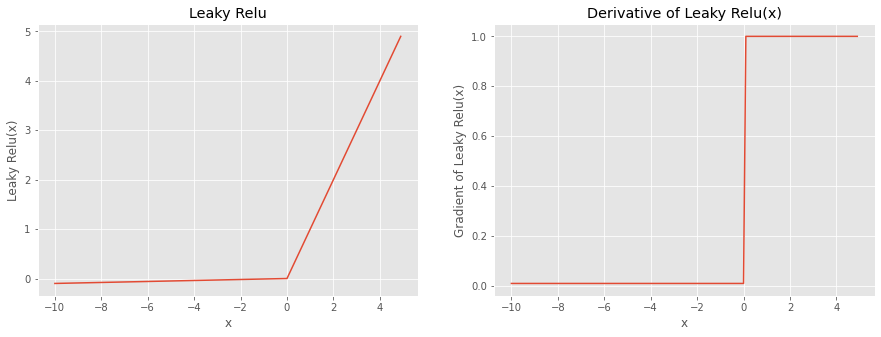

In [277]:
# Leaky relu function
x = np.arange(-10, 5, 0.1)
def leaky_relu(x):
    if x < 0:
        return 0.01 * x
    else:
        return x

# Leaky relu derivative function
def leaky_relu_derivative(x):
    if x < 0:
        return 0.01
    else:
        return 1

    
fig = plt.figure(figsize=(15, 5))
plot1 = fig.add_subplot(1, 2, 1)
y1 = [leaky_relu(i) for i in x]
plot1.grid(True)
plot1.set_xlabel('x')
plot1.set_ylabel('Leaky Relu(x)')
plot1.set_title('Leaky Relu')

plot2 = fig.add_subplot(1, 2, 2)
y2 = [leaky_relu_derivative(i) for i in x]
plot2.grid(True)
plot2.set_xlabel('x')
plot2.set_ylabel('Gradient of Leaky Relu(x)')
plot2.set_title('Derivative of Leaky Relu(x)')


plot1.plot(x, y1)
plot2.plot(x, y2)

<span style="color:red">**(b)**</span> $\text{Softplus'}\left(x\right)=\frac{e^{x}}{{1}+e^{x}}=\frac{1}{{1}+e^{-x}}
\\\text{Output range: 0 to 1} $

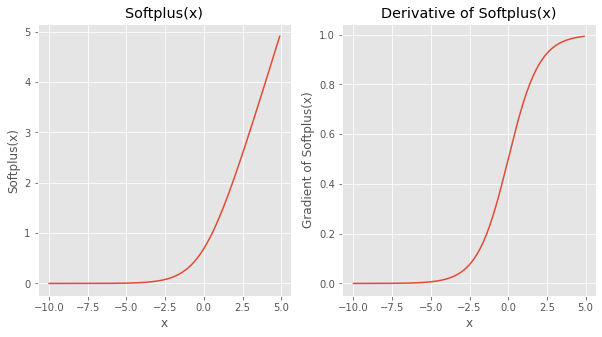

In [278]:
def softplus(x):
    return np.log(1+math.e**x)

def softplus_derivative(x):
    return 1/(1+math.e**(-x))

y1 = [softplus(i) for i in x]
y2 = [softplus_derivative(i) for i in x]

fig = plt.figure(figsize = (10, 5))
plot1 = fig.add_subplot(1, 2, 1)
plot1.grid(True)
plot1.set_xlabel('x')
plot1.set_ylabel('Softplus(x)')
plot1.set_title('Softplus(x)')

plot2 = fig.add_subplot(1, 2, 2)
plot2.grid(True)
plot2.set_xlabel('x')
plot2.set_ylabel('Gradient of Softplus(x)')
plot2.set_title('Derivative of Softplus(x)')


plot1.plot(x, y1)
plot2.plot(x, y2)


<span style="color:#0b486b"> **Numpy is possibly being used in the following questions. You need to import numpy here.** </span>

In [4]:
import numpy as np

####  <span style="color:red">**Question 1.2**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the ReLU activation function as shown in the following figure**
<img src="Figures/Q2_P1.png" width="500" align="center"/>


<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(e)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(e)**</span>  Assume that we are applying the label smoothing technique (i.e.,  [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) with $\alpha = 0.1$. What is the relevant loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

<span style="color:red">**(a)**</span>  $h_1(x)= ReLu(X \times W^1 + b^1) = \begin{bmatrix} 4 \\ 1\\ 6\\ 2 \end{bmatrix}$.

In [279]:
def relu(x):
    return np.maximum(0, x)

In [280]:
# x array
x = np.array([[1], [-1], [1]])

# weight and bias
W_1 = np.array([[1, -1, 1], [1, -1, -1], [2, -1, 2], [-1, -2, 1]])
b_1 = np.array([[1 ,0,1, 0]])
b_1 = np.transpose(b_1)

# calculate W1*x + b
h_bar_1 = W_1.dot(x) + b_1

# using relu as the activation function
h_1 = relu(h_bar_1)
print(h_1)

[[4]
 [1]
 [6]
 [2]]


<span style="color:red">**(b)**</span>  $h_2(x)= ReLu(W^2 \times h_1(x) + b^2) = \begin{bmatrix} 2 \\ 8\\ 0 \end{bmatrix}$.

In [281]:
# b
W_2 = np.array([[1, -1, -1, 2], [1, -1, 1, -1], [-1, 2, -1, 2]])
b_2 = np.array([[1 ,1, 0]])
b_2 = np.transpose(b_2) 
h_bar_2 = W_2.dot(h_1) + b_2
h_2 = relu(h_bar_2)
print(h_2)

[[2]
 [8]
 [0]]


<span style="color:red">**(c)**</span>  $\bar h_3(x) = W^3 \times h_2(x) + b^3 = \begin{bmatrix} -14\\ 18\\ 6 \end{bmatrix}$.

In [282]:
# c
W_3 = np.array([[1, -2, 1], [1, 2, -1], [-1, 1, -1]])
b_3 = [[0, 0, 0]]
b_3 = np.transpose(b_3)
h_3 = W_3.dot(h_2)+b_3
print(h_3)


[[-14]
 [ 18]
 [  6]]


<span style="color:red">**(d)**</span>  $p(x)= softmax(\bar h_3(x))= \begin{bmatrix} 1.2264 \times e^{-14} \\ 9.9999 \times e^{-1}\\ 6.1442 \times e^{-6} \end{bmatrix}$.

In [283]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

p = softmax(h_3)
print(p)

[[1.26640877e-14]
 [9.99993856e-01]
 [6.14417460e-06]]


<span style="color:red">**(e)**</span>  $CE= \sum_{i=1}^n y_i \times log(p(x)_i) = 6.1442 \times e^{-6}$.

In [284]:
y = np.array([[0], [1], [0]])
print(-np.sum(y*np.log(p)))

6.144193490381994e-06


<span style="color:red">**(e)**</span>  $ label smoothing labels = y \times (1 - \alpha) + \frac{\alpha}{num classes} = 1.4667$.

In [285]:
#onehot_label_smoothing= onehot_labels * (1 – label_smoothing) + label_smoothing / num_classes
new_labels  = y.dot(1-0.1) + 0.1/3
print(-np.sum(new_labels*np.log(p)))

1.4666728108601572


####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow4(LeakyReLU)\rightarrow 3(Output)$) as shown in the following figure. Note that the LeakyReLU has the same formula as the one in Q1.1.**


<img src="Figures/Q3_P1.png" width="500" align="center"/>

We feed a feature vector $x=\left[\begin{array}{ccc}
1 & -1 & 1.5\end{array}\right]^{T}$ with ground-truth label $y=3$ to the above network. 


**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [231]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
student_id = 31902634      #insert your student id here for example 1234    
np.random.seed(student_id)
W1 = np.random.rand(4,3)
b1 = np.random.rand(4,1)
W2 = np.random.rand(3,4)
b2 = np.random.rand(3,1)

**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*Show your fomular:*  $\bar h_1(x)= W^1 x + b^1 = \begin{bmatrix} 1.34 \\ 1.09\\ 0.88\\ 1.31 \end{bmatrix}$.



In [232]:
# Show your code
x = np.array([[1], [-1], [1.5]])    
h1_bar = W1.dot(x) + b1
print(h1_bar)

[[1.33581011]
 [1.09412373]
 [0.88323843]
 [1.31183349]]


<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your fomular* : $h_1(x)= LeakyRelu(\bar h_1) = \begin{bmatrix} 1.34 \\ 1.09\\ 0.88\\ 1.31 \end{bmatrix}$.



In [233]:
#Show your code
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

h1 = leaky_relu(h1_bar)
print(h1)

[[1.33581011]
 [1.09412373]
 [0.88323843]
 [1.31183349]]


<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your fomular* : $p(x) = W^2 \times h_1(x) + b^2 \\
\hat{y} = index(max(p(x)) = 2
$



In [234]:
#Show your code
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

h2 = W2.dot(h1) + b2
p_x = softmax(h2)
print(p_x.argmax()+1)

2


<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your fomular* : $l = \sum_{i=1}^n y_i \times log(p(x)_i) = 0.5271$.



In [235]:
#Show your code
y = np.array([[0], [1], [0]])
print(-np.sum(y*np.log(p_x)))


0.5271155748768622


**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

*Show your fomular:* <br>
$\frac{\partial l}{\partial h^{2}} = g^2 = -1_y + softmax(h^3) = p^T-1_y $ <br>\
$\frac{\partial l}{\partial W^{2}} = \frac{\partial l}{\partial h^{2}} \times \frac{\partial h^{2}}{\partial W^{2}} = (g^{2})^{T} \times (h^{2})^{T} = \frac{\partial l}{\partial h^{2}} \times  (h^{2})^{T} $ <br>
\
$\frac{\partial l}{\partial b^{2}} = \frac{\partial l}{\partial h^{2}} \times \frac{\partial h^{2}}{\partial b^{2}} = g^2$

$\frac{\partial l}{\partial h^{2}} = \begin{bmatrix} 0.3113 & -0.4096 & 0.0983 \end{bmatrix}$ <br> \
$\frac{\partial l}{\partial W^{2}} = \begin{bmatrix} 0.4160 & -0.3407 & 0.2750 & 0.4085 \\ -0.5473 & -0.4483 & -0.3619 & -0.5375 \\ 0.1313 & 0.1076 & 0.0868 & 0.1290 \end{bmatrix} $ <br>\
$\frac{\partial l}{\partial b^{2}} = \begin{bmatrix} 0.3113 & -0.4096 & 0.0983 \end{bmatrix}$ <br> 

In [271]:
#Show your code
dl_dh2 = np.transpose(p_x-y)
print('dl_dh2: ', dl_dh2) 

dl_dw2 = (np.transpose(dl_dh2)).dot(np.transpose(h1))
print('dl_dw2: ', dl_dw2)

dl_db2 = dl_dh2
print('dl_db2: ', dl_db2)
dl_db2

dl_dh2:  [[ 0.3113842  -0.40969479  0.0983106 ]]
dl_dw2:  [[ 0.41595016  0.34069284  0.27502649  0.40848422]
 [-0.54727444 -0.44825679 -0.36185818 -0.53745135]
 [ 0.13132429  0.10756396  0.0868317   0.12896713]]
dl_db2:  [[ 0.3113842  -0.40969479  0.0983106 ]]


array([[ 0.3113842 , -0.40969479,  0.0983106 ]])

<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

*Show your fomular* <br>
$\frac{\partial l}{\partial h^{1}} =  \frac{\partial l}{\partial h^{2}} \times  \frac{\partial h^{2}}{\partial h^{1}}$
<br> 


$\frac{\partial l}{\partial \bar{h}^{1}} = \frac{\partial l}{\partial {h}^{1}} \times \frac{\partial h^{1}}{\partial \bar{h}^{1}} = \frac{\partial l}{\partial {h}^{1}} diag(\sigma^{'}(\bar{h}^{1})) $ <br> 


$\frac{\partial l}{\partial W^{1}} = \frac{\partial l}{\partial \bar{h}^{1}} \times \frac{\partial \bar{h}^{1}}{\partial W^{1}} = \frac{\partial l}{\partial \bar{h}^{1}} \times (h^{0})^{T} = \frac{\partial l}{\partial \bar{h}^{1}} \times x $
<br> 


$\frac{\partial l}{\partial b^{1}} = \frac{\partial l}{\partial \bar{h}^{1}} \times \frac{\partial \bar{h}^1}{\partial b^{1}} = \frac{\partial l}{\partial \bar{h}^{1}}$ <br> 


$\frac{\partial l}{\partial h^{1}} = \begin{bmatrix} 0.0718 & -0.1554 & 0.1060 & -0.1667 \end{bmatrix}$ <br> \
$\frac{\partial l}{\partial \bar{h}^{1}} = \begin{bmatrix} 0.0718 & -0.1554 & 0.1060 & -0.1667 \end{bmatrix}$ <br> \
$\frac{\partial l}{\partial W^{1}} = \begin{bmatrix} 0.0718 & -0.0718 & 0.1077 & \\ -0.1554 & 0.1554 & -0.2332 \\
0.1060 &  -0.1060 & 0.1590 \\ -0.1667 & 0.1667 & -0.2500 \end{bmatrix} $ <br> \
$\frac{\partial l}{\partial b^{1}} = \begin{bmatrix} 0.0718 & -0.1554 & 0.1060 & -0.1667 \end{bmatrix}$

In [269]:
#Show your code
dl_dh1 = dl_dh2.dot(W2)
print('dl_dh1: ', dl_dh1)

def leaky_relu_derivative(x):
    return np.where(x<0, 0.01, 1)
v = leaky_relu_derivative(h1_bar)
d = np.diag(v[:,0])
dl_dh1_bar = dl_dh1.dot(d)
print('dl_dh1_bar: ', dl_dh1_bar)

dl_dw1= np.transpose(dl_dh1_bar).dot(np.transpose(x))
print('dl_dw1: ', dl_dw1)

dl_db1 = dl_dh1_bar
print('dl_db1: ', dl_db1)

dl_dh1:  [[ 0.0717889  -0.15544759  0.10601298 -0.16667974]]
dl_dh1_bar:  [[ 0.0717889  -0.15544759  0.10601298 -0.16667974]]
dl_dw1:  [[ 0.0717889  -0.0717889   0.10768335]
 [-0.15544759  0.15544759 -0.23317139]
 [ 0.10601298 -0.10601298  0.15901947]
 [-0.16667974  0.16667974 -0.25001961]]
dl_db1:  [[ 0.0717889  -0.15544759  0.10601298 -0.16667974]]


**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[5 points]</span></div>

*Show your fomular*
<br>
$W^2 = W^2 - 0.01 \times \frac{\partial l}{\partial W^{2}} $ <br> \
$b^2 = b^2 - 0.01 \times (\frac{\partial l}{\partial b^{2}})^T$<br> \
$W^1 = W^1 - 0.01 \times \frac{\partial l}{\partial W^{1}} $<br>\
$b^1 = b^1 - 0.01 \times (\frac{\partial l}{\partial b^{1}})^T$<br>


$W^2 = \begin{bmatrix} 0.8282 & 0.4826 & 0.6902 & 0.6796 \\ 0.6843 & 0.8176 & 0.4690 & 0.9569 \\ 0.9214 & 0.2671 & 0.8222 & 0.1032 \end{bmatrix}$<br> \
$b^2 = \begin{bmatrix} 0.6386 \\ 0.9821 \\ 0.2505 \end{bmatrix}$<br>\
$W^1 = \begin{bmatrix} 0.9977 & 0.1580 & 0.2605 \\ 0.9148 & 0.6581 & 0.0843 \\ 0.1691 & 0.5191 & 0.4160 \\ 0.9490 & 0.9029 & 0.2994 \end{bmatrix}$<br>\
$b^1 = \begin{bmatrix} 0.1041 \\ 0.7154 \\ 0.6061 \\ 0.8246 \end{bmatrix}$

In [270]:
#Show your code
new_W2 = W2 - 0.01 * (dl_dw2)
print('W2: ', new_W2)

new_b2 = b2 - 0.01 * np.transpose(dl_db2)
print('b2: ',new_b2)

new_W1 = W1 - 0.01 * dl_dw1
print('W1: ',new_W1)

new_b1 = b1 - 0.01 * np.transpose(dl_db1)
print('b1: ',new_b1)

W2:  [[0.82824693 0.48257881 0.69020784 0.67959629]
 [0.68431959 0.8176235  0.46903311 0.95690144]
 [0.92138187 0.26709216 0.8221832  0.10315878]]
b2:  [[0.6385562 ]
 [0.98216352]
 [0.25045582]]
W1:  [[0.99774434 0.15800252 0.2605097 ]
 [0.91479256 0.65807067 0.08426566]
 [0.16913845 0.51911123 0.41603345]
 [0.94901649 0.90298333 0.29936411]]
b1:  [[0.10153482]
 [0.71916435]
 [0.60359535]
 [0.82550485]]


## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [286]:
import tensorflow as tf
from tensorflow import keras

In [287]:
tf.random.set_seed(1234)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [288]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data()

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [289]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full =  X_train_full_img.reshape(num_train, -1)
X_test =   X_test_img.reshape(num_test, -1)
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [290]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [291]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = X_train_full[:i], y_train_full[:i]
X_valid, y_valid = X_train_full[i:], y_train_full[i:]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show **random** $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline

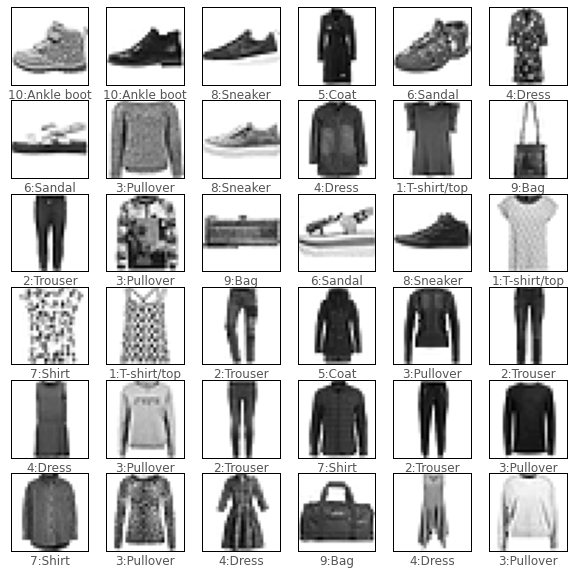

In [296]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# Dictionary for class and labels
labels = {1:'1:T-shirt/top', 
          2:'2:Trouser', 
          3:'3:Pullover', 
          4:'4:Dress', 
          5:'5:Coat', 
          6:'6:Sandal', 
          7:'7:Shirt', 
          8:'8:Sneaker', 
          9:'9:Bag', 
          10:'10:Ankle boot'}


fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
rand_num = np.random.choice(N, size=36, replace=False) # random 36 images selected without replacement
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train_full_img[rand_num[i]], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train_full[rand_num[i]]+1])
plt.show()


####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [310]:
#Insert your code here and you can add more cells if necessary
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [311]:
# create dnn models with layers
dnn_model = Sequential()
dnn_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
dnn_model.add(Dense(units=40, activation='relu'))
dnn_model.add(Dense(units=10, activation='softmax'))

In [312]:
dnn_model.build()
dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                15700     
                                                                 
 dense_12 (Dense)            (None, 40)                840       
                                                                 
 dense_13 (Dense)            (None, 10)                410       
                                                                 
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [313]:
# compile model
dnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [314]:
logdir = "tf_logs/"

# Init a tensorboard_callback 
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Call the fit method, passing the tensorboard_callback 
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, 
                        epochs=20, 
                        validation_data=(X_valid, y_valid), 
                       callbacks=[tensorboard_callback])

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5759 - accuracy: 0.7987 - val_loss: 0.4510 - val_accuracy: 0.8405
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4290 - accuracy: 0.8476 - val_loss: 0.4223 - val_accuracy: 0.8513
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3951 - accuracy: 0.8577 - val_loss: 0.3823 - val_accuracy: 0.8607
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8649 - val_loss: 0.3727 - val_accuracy: 0.8618
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3582 - accuracy: 0.8695 - val_loss: 0.3752 - val_accuracy: 0.8653
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3439 - accuracy: 0.8754 - val_loss: 0.3819 - val_accuracy: 0.8620
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3342 - accuracy: 0.8780 - val_loss: 0.3669 - val_accuracy:

In [315]:
dnn_model.evaluate(X_test, y_test)  #return loss and accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8690


[0.36596155166625977, 0.8690000176429749]

####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [316]:
#Insert your code here. You can add more cells if necessary
num_neurons = [20, 40]
activation_func = ['sigmoid', 'tanh', 'relu']

best_acc = 0
best_i = -1
best_j = -1
best_k = -1
for i in range(len(num_neurons)):
    for j in range(len(num_neurons)):
        for k in range(len(activation_func)):
            print("*Evaluating with n1: {}, n2: {}, act: {}\n".format(str(num_neurons[i]), str(num_neurons[j]), activation_func[k]))
            dnn_model_tuning = Sequential()
            dnn_model_tuning.add(Dense(units=num_neurons[i], input_shape=(784,), activation=activation_func[k]))
            dnn_model_tuning.add(Dense(units=num_neurons[j], activation=activation_func[k]))
            dnn_model_tuning.add(Dense(units=10, activation='softmax'))
            dnn_model_tuning.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            dnn_model_tuning.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
            acc = dnn_model_tuning.evaluate(X_test, y_test)[1]
            print("The valid accuracy is {}\n".format(acc))
            if acc > best_acc:
                best_acc = acc
                best_i = i
                best_j = j
                best_k = k
print("The best valid accuracy is {} with n1:{}, n2:{}, act:{}".format(best_acc, str(num_neurons[best_i]), str(num_neurons[best_j]), activation_func[best_k]))

*Evaluating with n1: 20, n2: 20, act: sigmoid

313/313 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8638
The valid accuracy is 0.8637999892234802

*Evaluating with n1: 20, n2: 20, act: tanh

313/313 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8670
The valid accuracy is 0.8669999837875366

*Evaluating with n1: 20, n2: 20, act: relu

313/313 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8677
The valid accuracy is 0.8676999807357788

*Evaluating with n1: 20, n2: 40, act: sigmoid

313/313 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8627
The valid accuracy is 0.8626999855041504

*Evaluating with n1: 20, n2: 40, act: tanh

313/313 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8676
The valid accuracy is 0.8676000237464905

*Evaluating with n1: 20, n2: 40, act: relu

313/313 [==============================] - 1s 2ms/step - loss: 0.3615 - acc

####  <span style="color:red">**Question 2.6**</span>. Experimenting with **the label smoothing** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

In [317]:
# label smoothing for each label in y datasets
def one_hot_label_smoothing(data, alpha):
    labels = np.ones((len(data), 10)) * alpha/10
    for i in range(len(data)):
        labels[i][data[i]] = 1 - alpha + alpha/10
    return labels

In [318]:
label_smoothing = [0.1, 0.15, 0.2]
best_acc = 0
best_i = -1
y_test_one_hot = tf.one_hot(y_test, 10).numpy()
for i in range(len(label_smoothing)):
    print("*Evaluating with label_smoothing: {}\n".format(str(label_smoothing[i])))
    y_train_label_smoothing =  one_hot_label_smoothing(y_train, label_smoothing[i])
    y_valid_label_smoothing =  one_hot_label_smoothing(y_valid, label_smoothing[i])
    y_test_one_hot = tf.one_hot(y_test, 10).numpy()
    dnn_model_label_smoothing = Sequential()
    dnn_model_label_smoothing.add(Dense(units=40,  input_shape=(784,), activation='relu'))
    dnn_model_label_smoothing.add(Dense(units=20, activation='relu'))
    dnn_model_label_smoothing.add(Dense(units=10, activation='softmax'))
    dnn_model_label_smoothing.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    dnn_model_label_smoothing.fit(x=X_train, y=y_train_label_smoothing, batch_size=32, epochs=20, validation_data=(X_valid, y_valid_label_smoothing), verbose = 0)
    acc = dnn_model_label_smoothing.evaluate(X_test, y_test_one_hot)[1]
    print("The valid accuracy is {}\n".format(acc))
    if acc > best_acc:
        best_acc = acc
        best_i = i
                
print("The best valid accuracy is {} with label_smoothing:{}".format(best_acc, str(label_smoothing[best_i])))

*Evaluating with label_smoothing: 0.1

313/313 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.8739
The valid accuracy is 0.8738999962806702

*Evaluating with label_smoothing: 0.15

313/313 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.8748
The valid accuracy is 0.8748000264167786

*Evaluating with label_smoothing: 0.2

313/313 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.8743
The valid accuracy is 0.8743000030517578

The best valid accuracy is 0.8748000264167786 with label_smoothing:0.15


## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [1]:
%load_ext autoreload
%autoreload 2

Install the package `imutils` if you have not installed yet

In [26]:
! pip install imutils

In [2]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [3]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [4]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [5]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [324]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [325]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [326]:
network1.build_cnn()
network1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d_32 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_33 (Avera  (None, 8, 8, 64)         0         
 gePooling2D)                                        

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [327]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 9s 133ms/step - loss: 2.3167 - accuracy: 0.1210 - val_loss: 2.3041 - val_accuracy: 0.0960
Epoch 2/20
63/63 [==============================] - 10s 154ms/step - loss: 2.2994 - accuracy: 0.1035 - val_loss: 2.3044 - val_accuracy: 0.0960
Epoch 3/20
63/63 [==============================] - 9s 147ms/step - loss: 2.3153 - accuracy: 0.1007 - val_loss: 2.3042 - val_accuracy: 0.1020
Epoch 4/20
63/63 [==============================] - 9s 137ms/step - loss: 2.3047 - accuracy: 0.0980 - val_loss: 2.2978 - val_accuracy: 0.0800
Epoch 5/20
63/63 [==============================] - 9s 138ms/step - loss: 2.3035 - accuracy: 0.0980 - val_loss: 2.3058 - val_accuracy: 0.0960
Epoch 6/20
63/63 [==============================] - 10s 161ms/step - loss: 2.3054 - accuracy: 0.0932 - val_loss: 2.3053 - val_accuracy: 0.1020
Epoch 7/20
63/63 [==============================] - 12s 198ms/step - loss: 2.3054 - accuracy: 0.1010 - val_loss: 2.3064 - val_accuracy: 0.0860
Epo

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [328]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 38ms/step - loss: 2.3048 - accuracy: 0.0980


0.09799999743700027

Below shows how you can inspect the training progress.

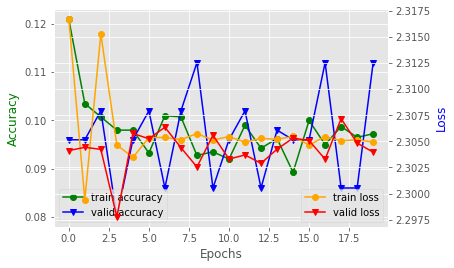

In [329]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [330]:
network1.predict(data_manager.X_test[0:10])

1/1 [==============================] - 0s 443ms/step


array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

16/16 [==============================] - 0s 23ms/step


<Figure size 432x288 with 0 Axes>

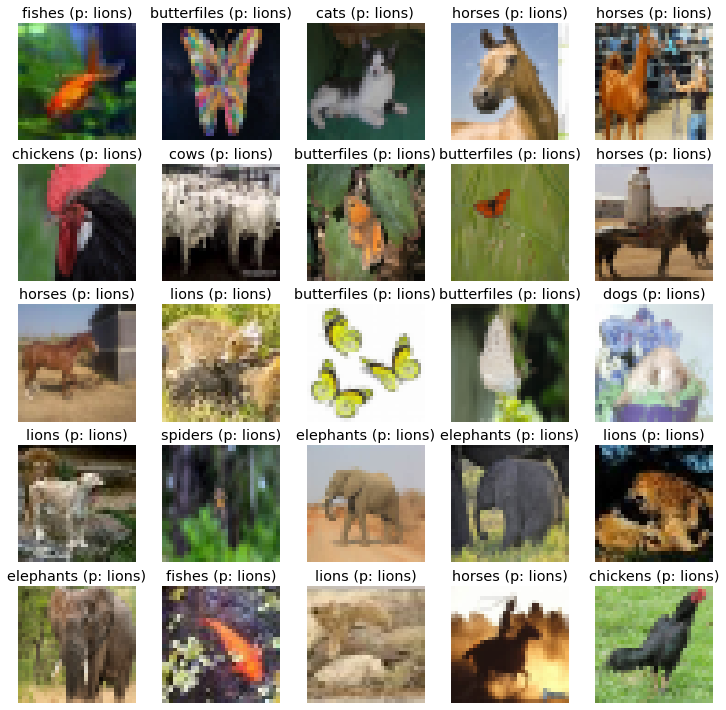

In [331]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

<span style="color:red">**Discussion**</span>  
_No. The model did not learn well. The accuracy rate of the prediction model is significantly low (less than 1%). The model is underfitting as it performs badly for both training dataset and testing dataset. The model may be too simple to predict a complex problem shown above. Also, the learning rate is too high which causes a high training loss during model fitting. The large batch size may cause a slower convergence to a better solutions. To improve the model, the model must be made to be more complex by adding more layers. The learning rate and batch size need to be reduce to allow a lower training loss and higher accuracy._

**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input

In [7]:
tf.random.set_seed(1234)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [318]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)    
        
        
    def build_cnn(self):
        model_input = Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i == 0:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(model_input)
            else:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
            if self.use_skip: #if skip_connection is used
                if self.batch_norm:
                    y = layers.BatchNormalization()(z)
                    y = layers.Activation(self.activation_func)(y)
                else:
                     y = layers.Activation(self.activation_func)(z)
                y = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(y)
                if self.batch_norm:
                    y = layers.BatchNormalization()(y)
                z = layers.Add()([z, y])
            else:
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
                z = layers.Activation(self.activation_func)(z)
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
            z = layers.Activation(self.activation_func)(z)
            z = layers.AveragePooling2D(strides=(2,2) , padding='same')(z)
            if self.drop_rate > 0:
                z = layers.Dropout(self.drop_rate)(z)
            
        z = layers.Flatten()(z)
        z = layers.Dense(self.num_classes, activation='softmax')(z)
        self.model = keras.Model(inputs = model_input, outputs = z, name= self.name)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
        
        

In [335]:
my_model = YourModel()
my_model.build_cnn()
my_model.summary()

Model: "network1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_68 (Conv2D)             (None, 32, 32, 32)   896         ['input_12[0][0]']               
                                                                                                  
 batch_normalization_64 (BatchN  (None, 32, 32, 32)  128         ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_64 (Activation)     (None, 32, 32, 32)   0           ['batch_normalization_64[0

<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

<span style="color:red">**Observation**</span> <br>
_The model that is not using the skip connection has performed better than the model using the skip connection. As seen from the learning curve graph shown below, both models experience overfitting as there is a large gap between training accuracy and valid accuracy. _




In [319]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "network1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_222 (Conv2D)            (None, 32, 32, 32)   896         ['input_36[0][0]']               
                                                                                                  
 batch_normalization_222 (Batch  (None, 32, 32, 32)  128         ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 32, 32, 32)   0           ['batch_normalization_222[

In [320]:
our_network_skip.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
125/125 [==============================] - 20s 142ms/step - loss: 1.8671 - accuracy: 0.3587 - val_loss: 2.2755 - val_accuracy: 0.1800
Epoch 2/20
125/125 [==============================] - 16s 131ms/step - loss: 1.4215 - accuracy: 0.5015 - val_loss: 2.0317 - val_accuracy: 0.2960
Epoch 3/20
125/125 [==============================] - 17s 134ms/step - loss: 1.1656 - accuracy: 0.5978 - val_loss: 1.6855 - val_accuracy: 0.4220
Epoch 4/20
125/125 [==============================] - 20s 156ms/step - loss: 0.9495 - accuracy: 0.6783 - val_loss: 1.4295 - val_accuracy: 0.5360
Epoch 5/20
125/125 [==============================] - 21s 165ms/step - loss: 0.7773 - accuracy: 0.7350 - val_loss: 1.4039 - val_accuracy: 0.5620
Epoch 6/20
125/125 [==============================] - 20s 163ms/step - loss: 0.6195 - accuracy: 0.7905 - val_loss: 1.2838 - val_accuracy: 0.5920
Epoch 7/20
125/125 [==============================] - 20s 162ms/step - loss: 0.4920 - accuracy: 0.8400 - val_loss: 1.2642 - val_ac

In [321]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "network1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_228 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_228 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_228 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_229 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_229 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                        

In [322]:
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
125/125 [==============================] - 21s 156ms/step - loss: 1.8877 - accuracy: 0.3462 - val_loss: 2.1066 - val_accuracy: 0.2260
Epoch 2/20
125/125 [==============================] - 19s 155ms/step - loss: 1.4608 - accuracy: 0.4922 - val_loss: 2.2624 - val_accuracy: 0.2800
Epoch 3/20
125/125 [==============================] - 19s 155ms/step - loss: 1.2527 - accuracy: 0.5652 - val_loss: 1.8719 - val_accuracy: 0.4080
Epoch 4/20
125/125 [==============================] - 21s 165ms/step - loss: 1.0458 - accuracy: 0.6425 - val_loss: 2.5660 - val_accuracy: 0.3860
Epoch 5/20
125/125 [==============================] - 19s 152ms/step - loss: 0.8998 - accuracy: 0.6977 - val_loss: 1.6575 - val_accuracy: 0.5040
Epoch 6/20
125/125 [==============================] - 19s 155ms/step - loss: 0.7734 - accuracy: 0.7410 - val_loss: 1.2292 - val_accuracy: 0.5980
Epoch 7/20
125/125 [==============================] - 20s 159ms/step - loss: 0.6080 - accuracy: 0.8005 - val_loss: 1.1868 - val_ac

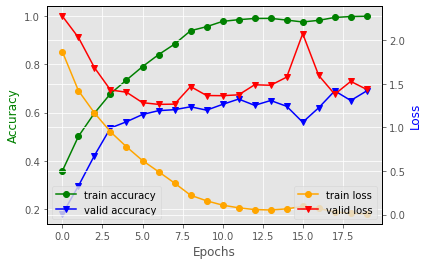

In [323]:
our_network_skip.plot_progress()

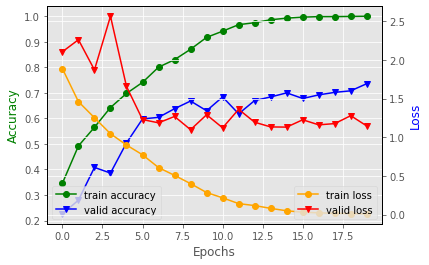

In [324]:
our_network_no_skip.plot_progress()

In [325]:
our_network_skip.compute_accuracy(data_manager.X_test, data_manager.y_test)
our_network_no_skip.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 1s 67ms/step - loss: 1.2022 - accuracy: 0.6920


0.6919999718666077

<span style="color:red">**Question 3.4**</span> **Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Report the best parameters and the testing accuracy here* <br>
The best valid accuracy is 0.708 when using the parameters num_blocks = 4, use_skip = False and learning rate = 0.001

In [342]:
#Insert your code here. You can add more cells if necessary
num_blocks_arr = [2, 3, 4]
use_skip_arr = [True, False]
learning_rate_arr = [0.001, 0.0001]
acc = 0
best_acc = acc
best_i = -1
best_j = -1
best_k = -1
for i in range(len(num_blocks_arr)):
    for j in range(len(use_skip_arr)):
        for k in range(len(learning_rate_arr)):
            print("*Evaluating with num_blocks: {}, use_skip: {}, learning_rate: {}\n".format(str(num_blocks_arr[i]), str(use_skip_arr[j]), str(learning_rate_arr[k])))
            network_tune = YourModel(name='network1',
                                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                                 num_blocks=num_blocks_arr[i], 
                                 batch_norm=True, 
                                 use_skip = use_skip_arr[j],
                                optimizer='adam',
                                 learning_rate= learning_rate_arr[k], verbose=False)
            network_tune.build_cnn()
            network_tune.fit(data_manager, batch_size=32, num_epochs=20)
            acc = network_tune.compute_accuracy(data_manager.X_test, data_manager.y_test)
            print("The valid accuracy is {}\n".format(acc))
            if acc > best_acc:
                best_acc = acc
                best_i = i
                best_j = j
                best_k = k
print("The best valid accuracy is {} with num_blocks: {}, use_skip: {}, learning_rate: {}"
      .format(best_acc, str(num_blocks_arr[best_i]), str(use_skip_arr[best_j]), str(learning_rate_arr[best_k])))

*Evaluating with num_blocks: 2, use_skip: True, learning_rate: 0.001

8/8 [==============================] - 0s 56ms/step - loss: 1.3447 - accuracy: 0.6220
The valid accuracy is 0.621999979019165

*Evaluating with num_blocks: 2, use_skip: True, learning_rate: 0.0001

8/8 [==============================] - 0s 46ms/step - loss: 1.1763 - accuracy: 0.5620
The valid accuracy is 0.5619999766349792

*Evaluating with num_blocks: 2, use_skip: False, learning_rate: 0.001

8/8 [==============================] - 0s 46ms/step - loss: 1.3834 - accuracy: 0.6280
The valid accuracy is 0.628000020980835

*Evaluating with num_blocks: 2, use_skip: False, learning_rate: 0.0001

8/8 [==============================] - 0s 56ms/step - loss: 1.1233 - accuracy: 0.6020
The valid accuracy is 0.6019999980926514

*Evaluating with num_blocks: 3, use_skip: True, learning_rate: 0.001

8/8 [==============================] - 1s 75ms/step - loss: 1.3334 - accuracy: 0.6320
The valid accuracy is 0.6320000290870667

*Evaluat

<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [297]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        model_input = Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i == 0:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(model_input)
            else:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
            if self.use_skip:
                if self.batch_norm:
                    y = layers.BatchNormalization()(z)
                    y = layers.Activation(self.activation_func)(y)
                else:
                     y = layers.Activation(self.activation_func)(z)
                y = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(y)
                if self.batch_norm:
                    y = layers.BatchNormalization()(y)
                z = layers.Add()([z, y])
            else:
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
                z = layers.Activation(self.activation_func)(z)
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
            z = layers.Activation(self.activation_func)(z)
            z = layers.AveragePooling2D(strides=(2,2) , padding='same')(z)
            if self.drop_rate > 0:
                z = layers.Dropout(self.drop_rate)(z)
            
        z = layers.Flatten()(z)
        z = layers.Dense(self.num_classes, activation='softmax')(z)
        self.model = keras.Model(inputs = model_input, outputs = z, name= self.name)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        early_checkpoint = EarlyStopping(patience=3, monitor='val_loss', mode='min')
        callbacks = [early_checkpoint]
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        if self.is_augmentation:
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
            datagen.fit(data_manager.X_train)
            data = datagen.flow(data_manager.X_train, data_manager.y_train, batch_size=32)
            self.history = self.model.fit(data, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, callbacks=callbacks, verbose= self.verbose)
        else:
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, 
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)

<span style="color:red">**Question 3.6**</span> **Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

_The model using data augmentation has a higher accuracy. This is because data augmentation has augmented clean data samples for training, making the model to generalize better to unseen data which also reduce overfitting which can be observed from the training progress chart shown below. The model that not using the data augmentation technique has an overfitting issue comparing to the model that uses the technique. The reduce of overfitting in the model is also due to the early stopping technique which prevents the model from becoming overly complex. The model that is not using data augmentation did not stop training early as it did not meet the requirement for early stopping to take place._



Epoch 1/20
125/125 [==============================] - 32s 243ms/step - loss: 2.0121 - accuracy: 0.3025 - val_loss: 2.4263 - val_accuracy: 0.1560
Epoch 2/20
125/125 [==============================] - 22s 176ms/step - loss: 1.6970 - accuracy: 0.4062 - val_loss: 1.9428 - val_accuracy: 0.2980
Epoch 3/20
125/125 [==============================] - 22s 177ms/step - loss: 1.5320 - accuracy: 0.4572 - val_loss: 1.9273 - val_accuracy: 0.3120
Epoch 4/20
125/125 [==============================] - 23s 185ms/step - loss: 1.4087 - accuracy: 0.5040 - val_loss: 1.3774 - val_accuracy: 0.5100
Epoch 5/20
125/125 [==============================] - 25s 198ms/step - loss: 1.3187 - accuracy: 0.5387 - val_loss: 1.3317 - val_accuracy: 0.5580
Epoch 6/20
125/125 [==============================] - 27s 216ms/step - loss: 1.2392 - accuracy: 0.5655 - val_loss: 1.3619 - val_accuracy: 0.5260
Epoch 7/20
125/125 [==============================] - 32s 255ms/step - loss: 1.1800 - accuracy: 0.5850 - val_loss: 1.2925 - val_ac

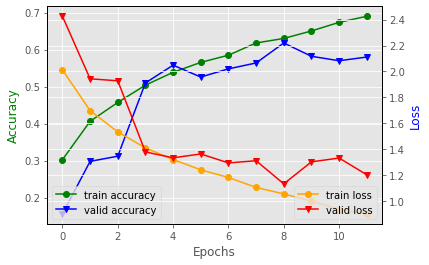

8/8 [==============================] - 1s 68ms/step - loss: 1.1475 - accuracy: 0.6080


0.6079999804496765

In [298]:
#Insert your code here. You can add more cells if necessary
network_data_aug = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                    is_augmentation = True,
                     learning_rate= 0.001)
network_data_aug.build_cnn()
network_data_aug.fit(data_manager, batch_size=32, num_epochs=20)
network_data_aug.plot_progress()
network_data_aug.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 27s 204ms/step - loss: 1.9918 - accuracy: 0.3103 - val_loss: 2.3015 - val_accuracy: 0.1580
Epoch 2/20
125/125 [==============================] - 29s 234ms/step - loss: 1.6007 - accuracy: 0.4300 - val_loss: 2.4396 - val_accuracy: 0.2460
Epoch 3/20
125/125 [==============================] - 27s 212ms/step - loss: 1.4130 - accuracy: 0.5015 - val_loss: 1.6246 - val_accuracy: 0.4300
Epoch 4/20
125/125 [==============================] - 25s 202ms/step - loss: 1.2377 - accuracy: 0.5650 - val_loss: 2.4538 - val_accuracy: 0.3160
Epoch 5/20
125/125 [==============================] - 30s 241ms/step - loss: 1.1178 - accuracy: 0.6085 - val_loss: 1.4522 - val_accuracy: 0.5220
Epoch 6/20
125/125 [==============================] - 31s 252ms/step - loss: 0.9717 - accuracy: 0.6635 - val_loss: 1.5029 - val_accuracy: 0.5360
Epoch 7/20
125/125 [==============================] - 31s 246ms/step - loss: 0.8418 - accuracy: 0.7103 - val_loss: 1.1408 - val_ac

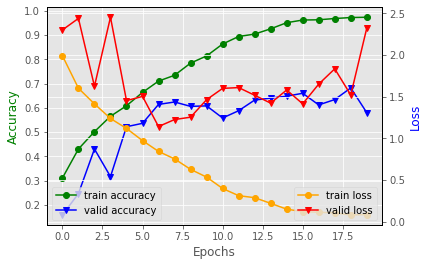

8/8 [==============================] - 1s 143ms/step - loss: 2.2348 - accuracy: 0.5560


0.5559999942779541

In [299]:
network_wo_data_aug = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                    is_augmentation = False,
                     learning_rate= 0.001)
network_wo_data_aug.build_cnn()
network_wo_data_aug.fit(data_manager, batch_size=32, num_epochs=20)
network_wo_data_aug.plot_progress()
network_wo_data_aug.compute_accuracy(data_manager.X_test, data_manager.y_test)

<span style="color:red">**Question 3.7**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

#*Write your answer and observation here* <br>
_The model accuracy has increases compared to the model that utilised the data augmentation only in the previous question. Data mix up further generalizes the model to unseen data to help the model to predict more accurately. However, there is a slight overfitting issue as compared to the model in the previous question. There is a larger gap between training and valid accuracy for this model._


In [300]:
import numpy as np

In [330]:
# Reference from https://github.com/yu4u/mixup-generator
class DataMixUpGenerator():
    def __init__(self, X_train, y_train, batch_size=32, alpha=0.2, datagen=None):
        self.X_train = X_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.alpha = alpha
        self.datagen = datagen

    def __call__(self):
        while True:
            indexes = np.arange(len(self.X_train))
            np.random.shuffle(indexes)
            itr_num = int(len(indexes) // (self.batch_size * 2))
            for i in range(itr_num):
                batch_ids = indexes[i * self.batch_size * 2:(i + 1) * self.batch_size * 2]
                X, y = self.data_generation(batch_ids)
                yield X, y
                
    def data_generation(self, batch_ids):
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)
        X_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        X1 = self.X_train[batch_ids[:self.batch_size]]
        X2 = self.X_train[batch_ids[self.batch_size:]]
        X = X1 * X_l + X2 * (1 - X_l)

        for i in range(self.batch_size):
            X[i] = self.datagen.random_transform(X[i])
            X[i] = self.datagen.standardize(X[i])

        y1 = self.y_train[batch_ids[:self.batch_size]]
        y2 = self.y_train[batch_ids[self.batch_size:]]
        y = y1 * y_l + y2 * (1 - y_l)

        return X, y

In [336]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        model_input = Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i == 0:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(model_input)
            else:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
            if self.use_skip:
                if self.batch_norm:
                    y = layers.BatchNormalization()(z)
                    y = layers.Activation(self.activation_func)(y)
                else:
                     y = layers.Activation(self.activation_func)(z)
                y = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(y)
                if self.batch_norm:
                    y = layers.BatchNormalization()(y)
                z = layers.Add()([z, y])
            else:
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
                z = layers.Activation(self.activation_func)(z)
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
            z = layers.Activation(self.activation_func)(z)
            z = layers.AveragePooling2D(strides=(2,2) , padding='same')(z)
            if self.drop_rate > 0:
                z = layers.Dropout(self.drop_rate)(z)
            
        z = layers.Flatten()(z)
        z = layers.Dense(self.num_classes, activation='softmax')(z)
        self.model = keras.Model(inputs = model_input, outputs = z, name= self.name)
        self.model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        early_checkpoint = EarlyStopping(patience=3, monitor='val_loss', mode='min')
        callbacks = [early_checkpoint]
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        self.model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        y_train_onehot = tf.one_hot(data_manager.y_train, 10).numpy()
        y_valid_onehot = tf.one_hot(data_manager.y_valid, 10).numpy()
        if self.is_augmentation:
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
            training_generator = DataMixUpGenerator(data_manager.X_train, y_train_onehot, batch_size=batch_size, alpha=0.2, datagen=datagen)()
            self.history = self.model.fit(training_generator, validation_data = (data_manager.X_valid, y_valid_onehot), 
                                     epochs = num_epochs, steps_per_epoch = len(data_manager.X_train)//batch_size, 
                                          callbacks=[callbacks], verbose= self.verbose)
            
            
        else:
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)

Epoch 1/20
125/125 [==============================] - 23s 177ms/step - loss: 2.0897 - accuracy: 0.2995 - val_loss: 2.3172 - val_accuracy: 0.1600
Epoch 2/20
125/125 [==============================] - 22s 176ms/step - loss: 1.7823 - accuracy: 0.4050 - val_loss: 2.5947 - val_accuracy: 0.2120
Epoch 3/20
125/125 [==============================] - 25s 201ms/step - loss: 1.6134 - accuracy: 0.4748 - val_loss: 2.4843 - val_accuracy: 0.2840
Epoch 4/20
125/125 [==============================] - 26s 206ms/step - loss: 1.4522 - accuracy: 0.5497 - val_loss: 1.9769 - val_accuracy: 0.3700
Epoch 5/20
125/125 [==============================] - 26s 207ms/step - loss: 1.3673 - accuracy: 0.5888 - val_loss: 1.4691 - val_accuracy: 0.5060
Epoch 6/20
125/125 [==============================] - 26s 206ms/step - loss: 1.2482 - accuracy: 0.6350 - val_loss: 1.2393 - val_accuracy: 0.5880
Epoch 7/20
125/125 [==============================] - 26s 208ms/step - loss: 1.1455 - accuracy: 0.6740 - val_loss: 1.3811 - val_ac

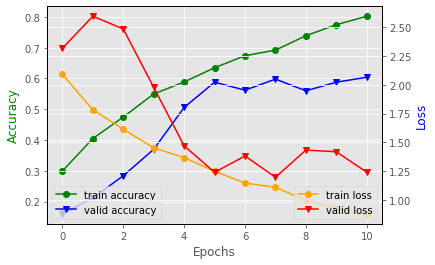

8/8 [==============================] - 1s 71ms/step - loss: 1.2501 - accuracy: 0.6200


0.6200000047683716

In [337]:
network_data_mixup = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                    is_augmentation = True,
                     learning_rate= 0.001)
network_data_mixup.build_cnn()
network_data_mixup.fit(data_manager, batch_size=32, num_epochs=20)
network_data_mixup.plot_progress()
y_test_onehot = tf.one_hot(data_manager.y_test, 10).numpy()
network_data_mixup.compute_accuracy(data_manager.X_test, y_test_onehot)

<span style="color:red">**Question 3.8**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [309]:
# remove the softmax activation function at the last layer to return logits
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)    
        
        
    def build_cnn(self):
        model_input = Input(shape=(32, 32, 3))
        for i in range(self.num_blocks):
            if i == 0:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(model_input)
            else:
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
            if self.use_skip:
                if self.batch_norm:
                    y = layers.BatchNormalization()(z)
                    y = layers.Activation(self.activation_func)(y)
                else:
                     y = layers.Activation(self.activation_func)(z)
                y = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(y)
                if self.batch_norm:
                    y = layers.BatchNormalization()(y)
                z = layers.Add()([z, y])
            else:
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
                z = layers.Activation(self.activation_func)(z)
                z = layers.Conv2D(self.feature_maps[i], (3,3),  padding='same', strides=(1, 1))(z)
                if self.batch_norm:
                    z = layers.BatchNormalization()(z)
            z = layers.Activation(self.activation_func)(z)
            z = layers.AveragePooling2D(strides=(2,2) , padding='same')(z)
            if self.drop_rate > 0:
                z = layers.Dropout(self.drop_rate)(z)
            
        z = layers.Flatten()(z)
        z = layers.Dense(self.num_classes, activation=None)(z) # activation function is set to None to return logits
        self.model = keras.Model(inputs = model_input, outputs = z, name= self.name)
        self.model.compile(optimizer=self.optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        self.model.compile(optimizer=self.optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, 
                                      validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)

In [308]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)

Model: "network1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_206 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_206 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_206 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_207 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_207 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                        

In [310]:
#Insert your code here. You can add more cells if necessary
def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3, 
               clip_value_min=0., 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        output = model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples 
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image


In [311]:
def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + np.float32(random_noise)

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image

In [312]:
def mim_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              gamma= 0.9,
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        gamma: momentum decay
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + np.float32(random_noise)
    adv_noise = np.float32(random_noise)

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image

In [93]:
def next_batch_test_data(batch_size=32):
    idx = np.random.RandomState(6789).choice(data_manager.X_test.shape[0], batch_size, replace=batch_size > data_manager.X_test.shape[0])
    return data_manager.X_test[idx], data_manager.y_test[idx]

In [94]:
import math

In [125]:
def create_batch_data(batch_size=32):
    data = []
    for i in range(len(data_manager.X_test)//batch_size):
        data += [next_batch_test_data(batch_size=batch_size)]
    return data

In [158]:
y_adv = []
y_true = []
data = create_batch_data()
for i in range(len(data)):
    X_batch = data[i][0]
    y_batch = data[i][1]
    X_batch_adv = fgsm_attack(our_network_no_skip.model, X_batch, y_batch,  0.0313, 0, 1.0, False, True)
    y_batch_adv = np.argmax(our_network_no_skip.model(X_batch_adv).numpy(), 1)
    y_adv += y_batch_adv.tolist()
    y_true += y_batch.tolist()

acc = tf.keras.metrics.Accuracy()
acc.update_state(y_true, y_adv)
print(acc.result().numpy())

0.125


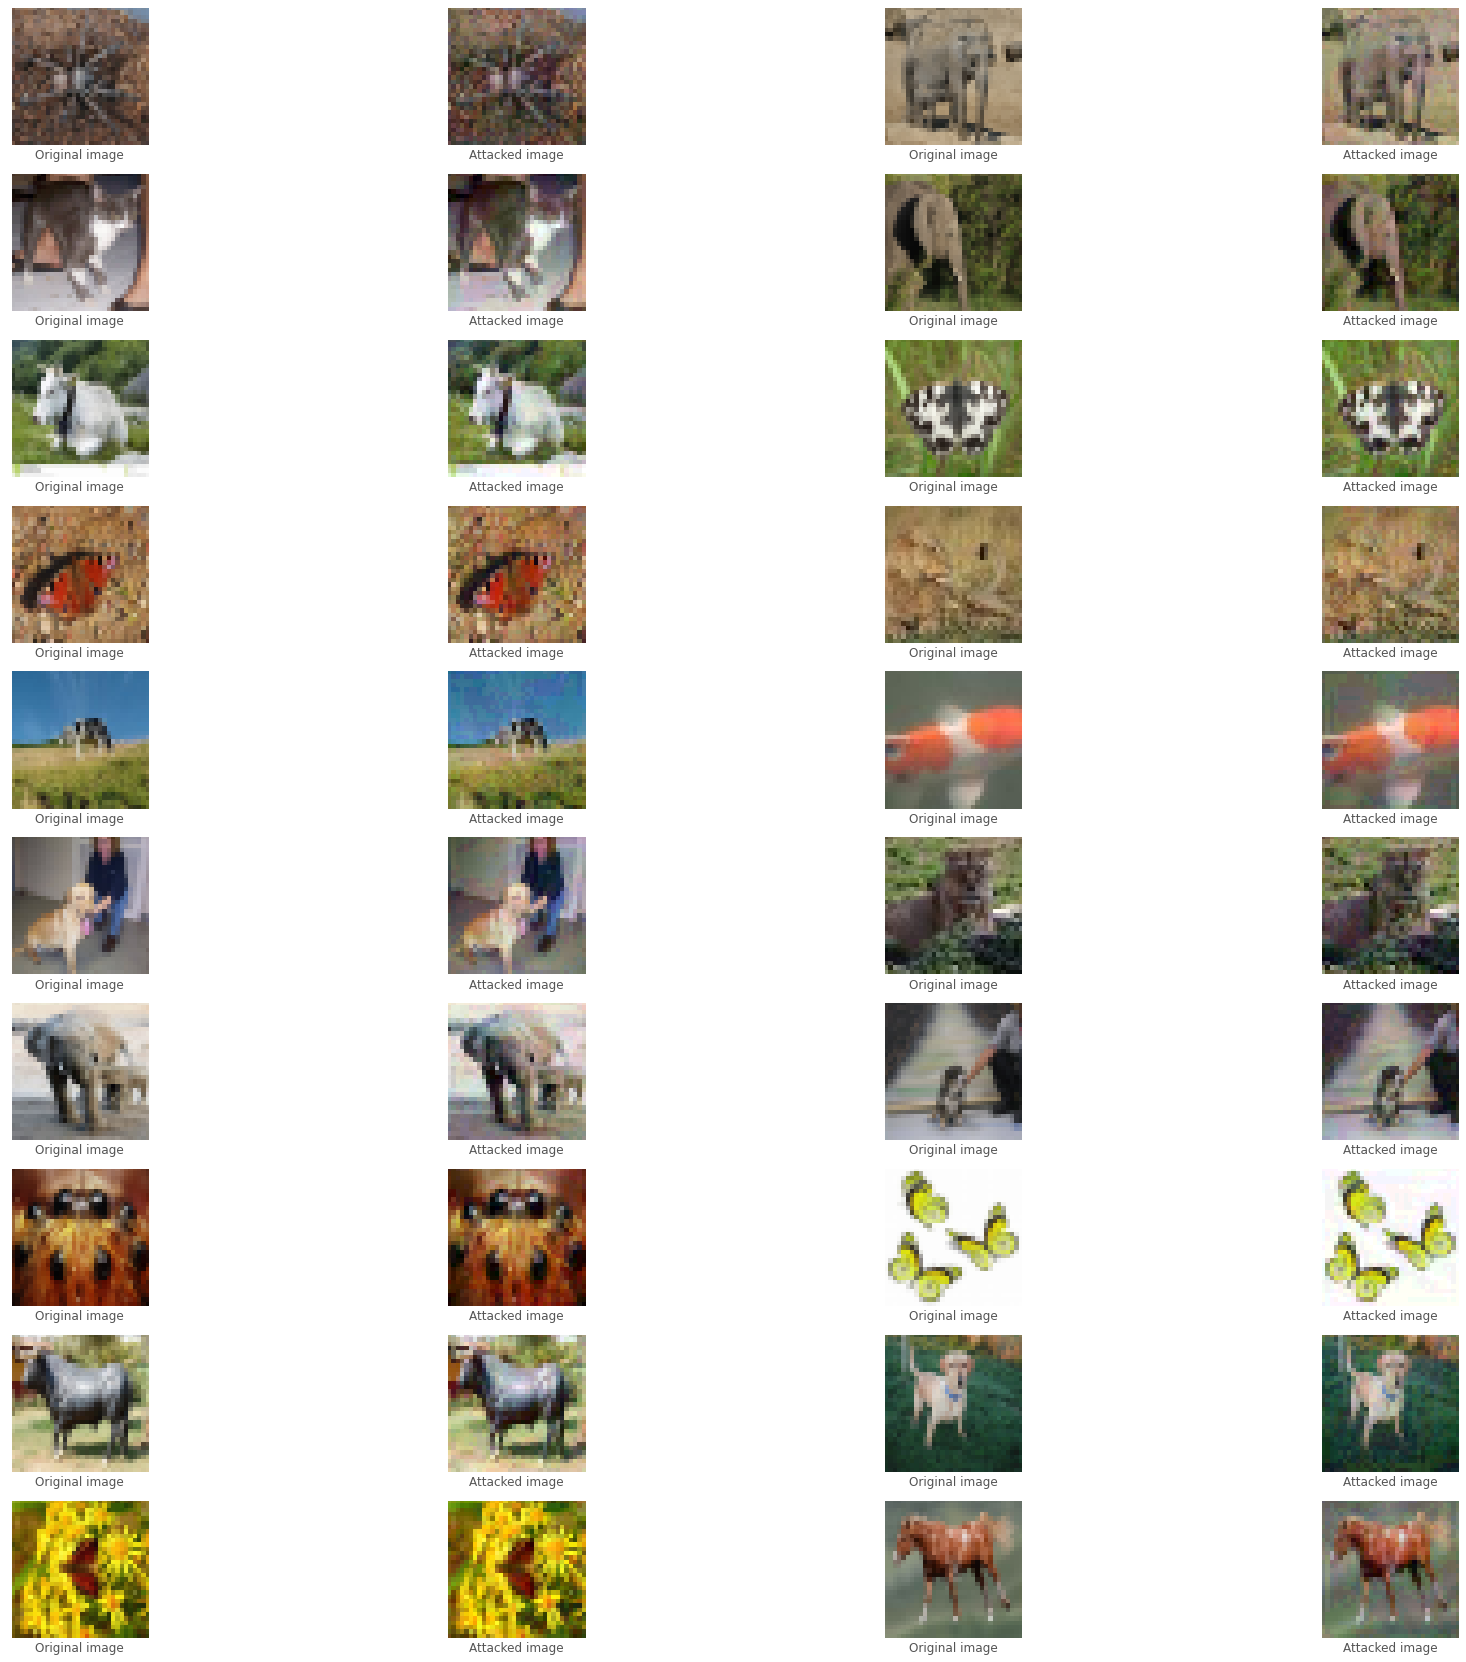

In [186]:
fig = plt.figure(figsize=(30,30))
rand_num = np.random.choice(len(data_manager.X_test), size=20, replace=False) # random 20 images selected without replacement
for i in range(40):
    plt.subplot(10, 4,i+1)
    plt.xticks([])
    plt.yticks([])
    if i % 2 == 0:
        plt.imshow((data_manager.X_test[i]+1)/2)
        plt.xlabel('Original image')
    else:
        adv_img = fgsm_attack(model=our_network_no_skip.model, input_image = ((data_manager.X_test[i-1]+1)/2)
                              .reshape(1, 32, 32, 3), epsilon = 0.0313, soft_label=True)
        plt.imshow(adv_img.numpy()[0])
        plt.xlabel('Attacked image')
plt.show()

In [222]:
y_adv = []
y_true = []
data = create_batch_data()
for i in range(len(data)):
    X_batch = data[i][0]
    y_batch = data[i][1]
    X_batch_adv = pgd_attack(our_network_no_skip.model, X_batch, y_batch,  0.0313, 20, 0.002, 0, 1.0, False, True)
    y_batch_adv = np.argmax(our_network_no_skip.model(X_batch_adv).numpy(), 1)
    y_adv += y_batch_adv.tolist()
    y_true += y_batch.tolist()

acc = tf.keras.metrics.Accuracy()
acc.update_state(y_true, y_adv)
print(acc.result().numpy())


0.09375


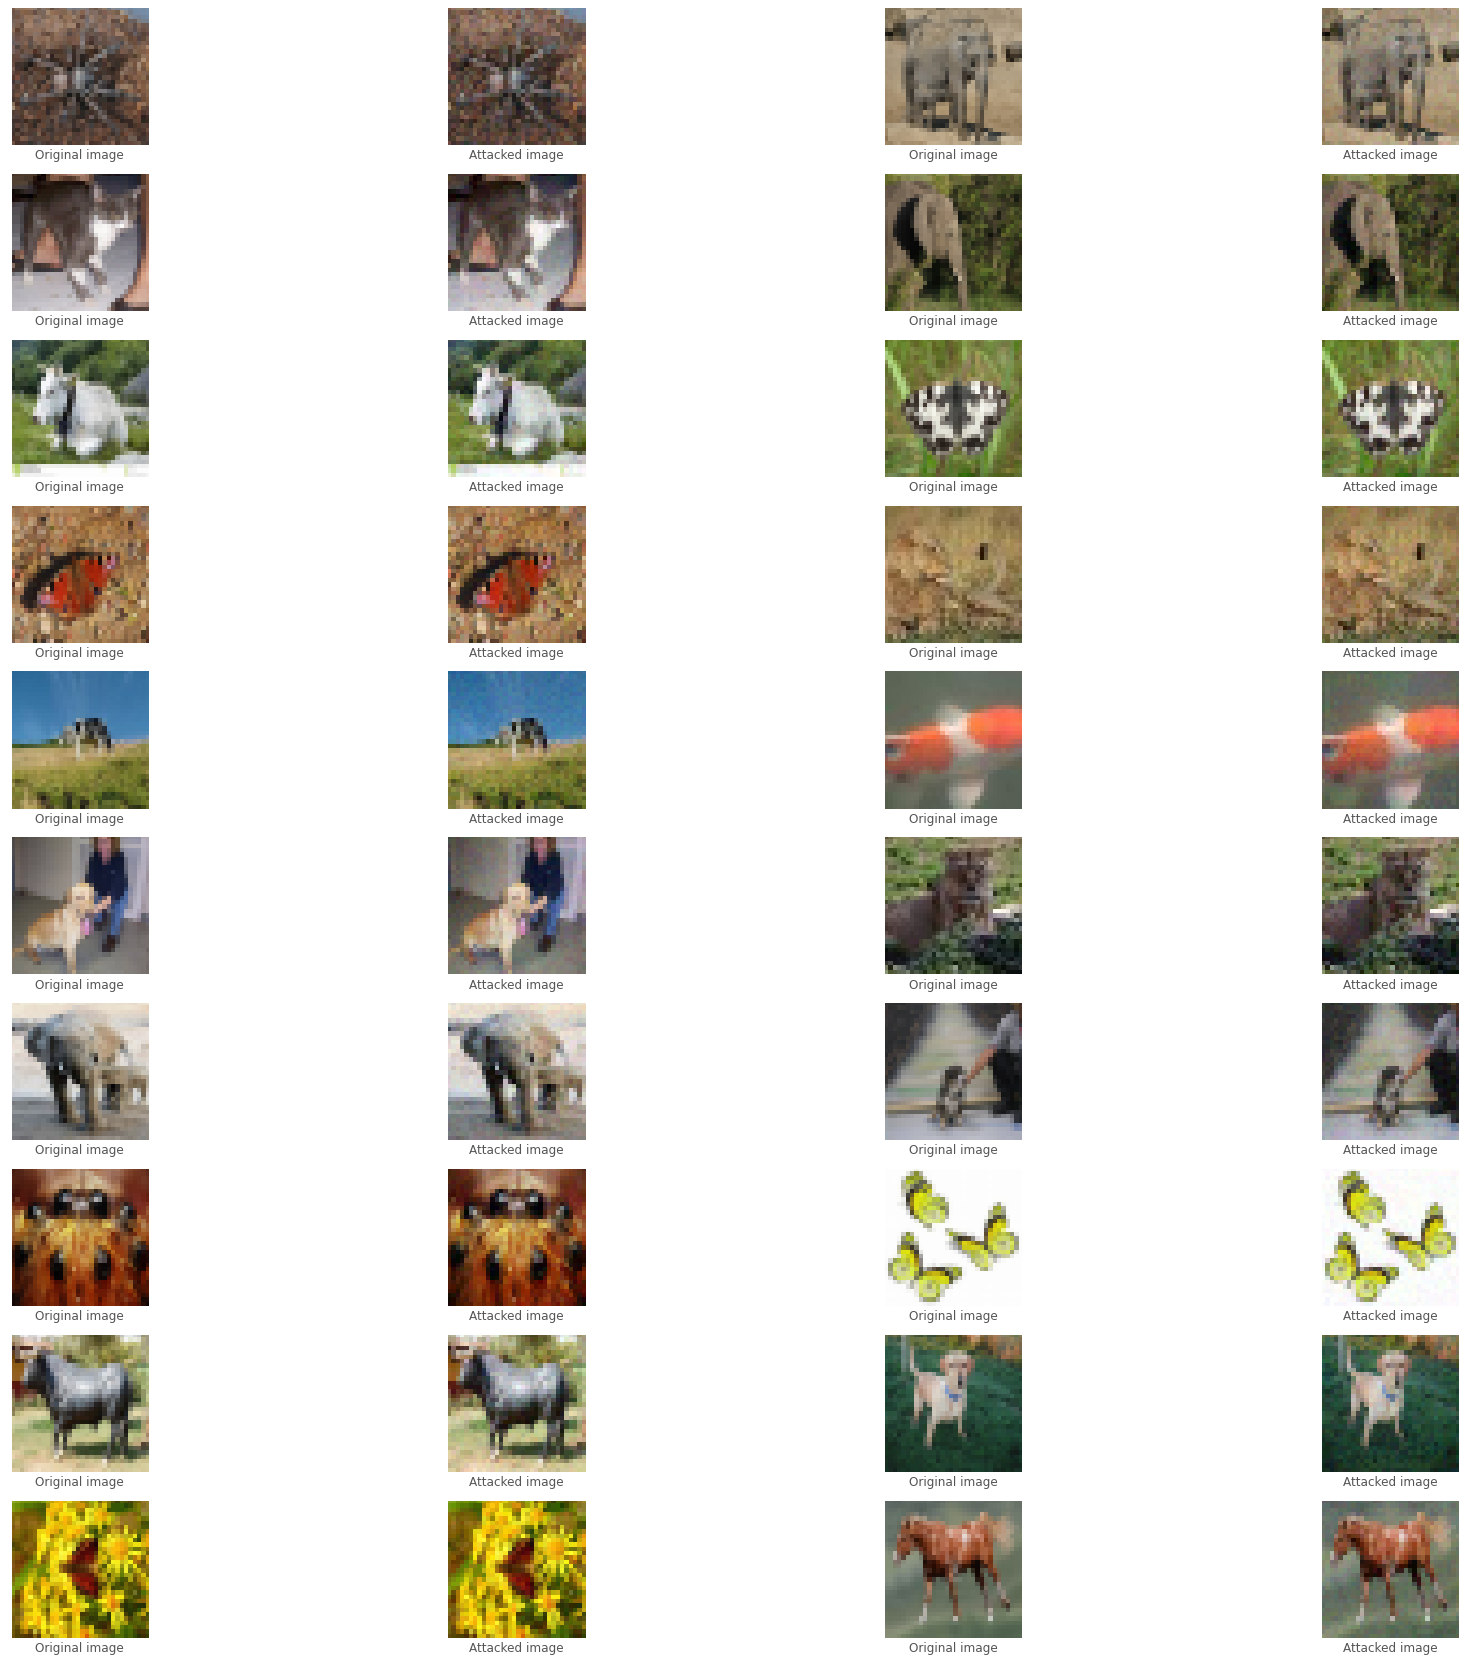

In [187]:
fig = plt.figure(figsize=(30,30))
rand_num = np.random.choice(len(data_manager.X_test), size=20, replace=False) # random 20 images selected without replacement
for i in range(40):
    plt.subplot(10, 4,i+1)
    plt.xticks([])
    plt.yticks([])
    if i % 2 == 0:
        plt.imshow((data_manager.X_test[i]+1)/2)
        plt.xlabel('Original image')
    else:
        adv_img = pgd_attack(model=our_network_no_skip.model, input_image = ((data_manager.X_test[i-1]+1)/2)
                             .reshape(1, 32, 32, 3), epsilon = 0.0313, num_steps = 20, step_size = 0.002, soft_label=True)
        plt.imshow(adv_img.numpy()[0])
        plt.xlabel('Attacked image')
plt.show()

In [223]:
y_adv = []
y_true = []
data = create_batch_data()
for i in range(len(data)):
    X_batch = data[i][0]
    y_batch = data[i][1]
    X_batch_adv = mim_attack(our_network_no_skip.model, X_batch, y_batch,  0.0313, 0.9, 20, 0.002, 0, 1.0, False, True)
    y_batch_adv = np.argmax(our_network_no_skip.model(X_batch_adv).numpy(), 1)
    y_adv += y_batch_adv.tolist()
    y_true += y_batch.tolist()

acc = tf.keras.metrics.Accuracy()
acc.update_state(y_true, y_adv)
print(acc.result().numpy())

0.09375


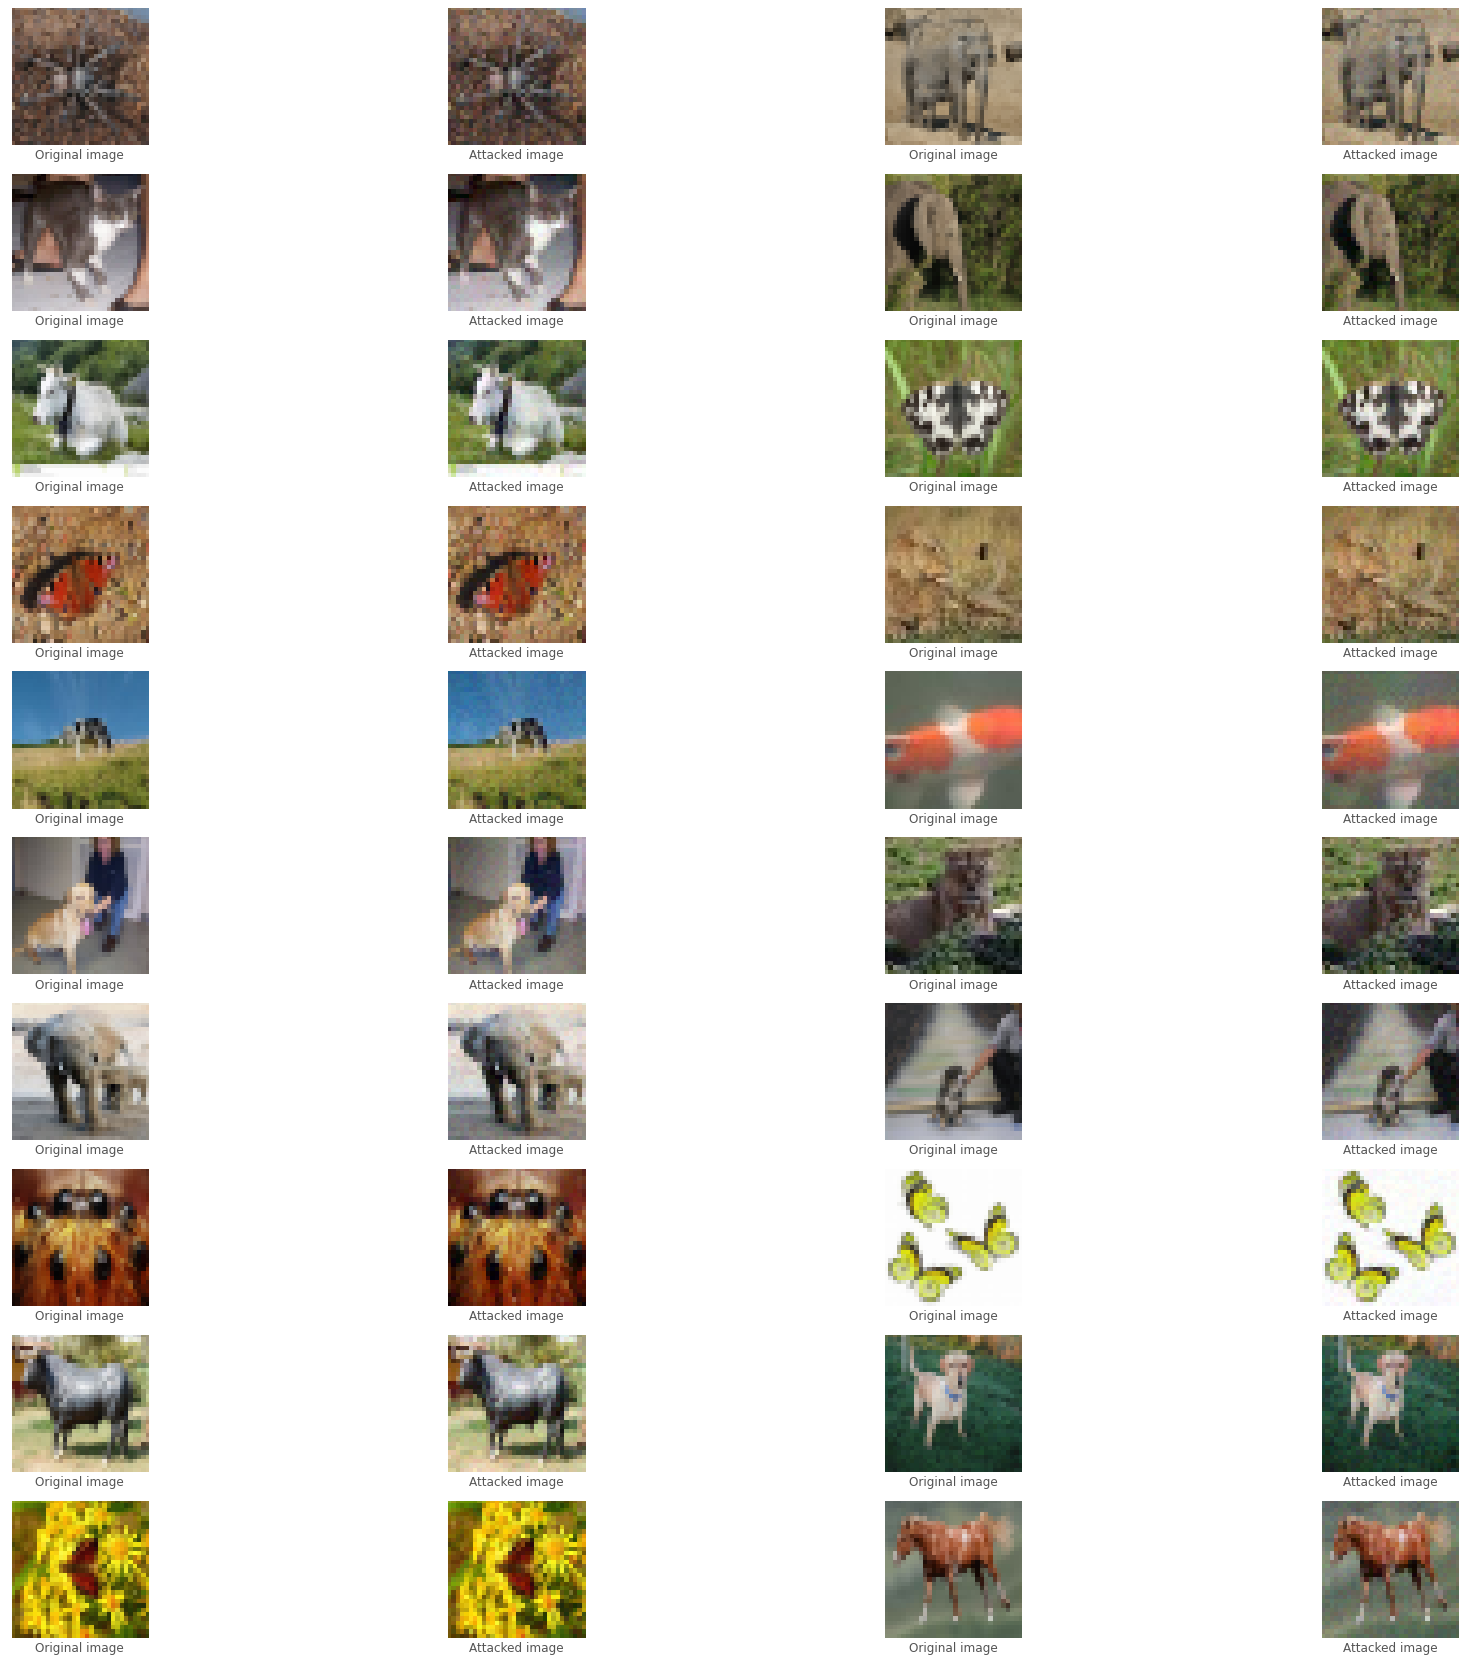

In [188]:
fig = plt.figure(figsize=(30,30))
rand_num = np.random.choice(len(data_manager.X_train), size=20, replace=False) # random 20 images selected without replacement
for i in range(40):
    plt.subplot(10, 4,i+1)
    plt.xticks([])
    plt.yticks([])
    if i % 2 == 0:
        plt.imshow((data_manager.X_test[i]+1)/2)
        plt.xlabel('Original image')
    else:
        adv_img = mim_attack(model=our_network_no_skip.model, input_image = ((data_manager.X_test[i-1]+1)/2)
                             .reshape(1, 32, 32, 3), epsilon = 0.0313, num_steps = 20, step_size = 0.002, soft_label=True)
        plt.imshow(adv_img.numpy()[0])
        plt.xlabel('Attacked image')
plt.show()

<span style="color:red">**Question 3.9**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [313]:
adv_model = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
adv_model.build_cnn()
adv_model.summary()

Model: "network1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_214 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_214 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_214 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_215 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_215 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                        

In [314]:
#Insert your code here. You can add more cells if necessary
optimizer = tf.optimizers.Adam(learning_rate=0.001)
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()


In [315]:
def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        logits = adv_model.model(x)
        logits_adv = adv_model.model(x_adv)
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
        gradients = tape.gradient(loss, adv_model.model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, adv_model.model.trainable_variables))
    return loss

In [316]:
def create_batch_train_data(batch_size=32):
    data = []
    for i in range(math.ceil(len(data_manager.X_train)/batch_size)):
        data += [data_manager.next_batch(batch_size=batch_size)]
    return data

In [317]:
data = create_batch_train_data()
epochs = 5 # number of epochs
for epoch in range(epochs):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(60000, verbose=2)
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
       # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
        x_adv = pgd_attack(adv_model.model, x, y, 0.0313, 10, 0.002, 0.0, 1.0, False, False)
        loss = train_step_adv(x, x_adv, y)
        y_pred = adv_model.model(x)
        test_acc_clean(y, y_pred)
        train_loss(loss)
        progress_bar_train.add(x.shape[0], values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])
adv_model.model.save('./models')

INFO:tensorflow:Assets written to: ./models\assets


INFO:tensorflow:Assets written to: ./models\assets


In [242]:
loaded_adv_model = tf.keras.models.load_model('./models')

# Check its architecture
loaded_adv_model.summary()

Model: "network1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_58 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_58 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_59 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_59 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                         

In [245]:
y_adv = []
y_true = []
data = create_batch_data()
for i in range(len(data)):
    X_batch = data[i][0]
    y_batch = data[i][1]
    X_batch_adv = fgsm_attack(loaded_adv_model, X_batch, y_batch,  0.0313, 0, 1.0, False, True)
    y_batch_adv = np.argmax(loaded_adv_model(X_batch_adv).numpy(), 1)
    y_adv += y_batch_adv.tolist()
    y_true += y_batch.tolist()

acc = tf.keras.metrics.Accuracy()
acc.update_state(y_true, y_adv)
print(acc.result().numpy())

0.28125


In [246]:
y_adv = []
y_true = []
data = create_batch_data()
for i in range(len(data)):
    X_batch = data[i][0]
    y_batch = data[i][1]
    X_batch_adv = pgd_attack(loaded_adv_model, X_batch, y_batch,  0.0313, 20, 0.002, 0, 1.0, False, True)
    y_batch_adv = np.argmax(loaded_adv_model(X_batch_adv).numpy(), 1)
    y_adv += y_batch_adv.tolist()
    y_true += y_batch.tolist()

acc = tf.keras.metrics.Accuracy()
acc.update_state(y_true, y_adv)
print(acc.result().numpy())

0.15625


In [247]:
y_adv = []
y_true = []
data = create_batch_data()
for i in range(len(data)):
    X_batch = data[i][0]
    y_batch = data[i][1]
    X_batch_adv = mim_attack(loaded_adv_model, X_batch, y_batch,  0.0313, 0.9, 20, 0.002, 0, 1.0, False, True)
    y_batch_adv = np.argmax(loaded_adv_model(X_batch_adv).numpy(), 1)
    y_adv += y_batch_adv.tolist()
    y_true += y_batch.tolist()

acc = tf.keras.metrics.Accuracy()
acc.update_state(y_true, y_adv)
print(acc.result().numpy())

0.15625


--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**